<a href="https://colab.research.google.com/github/prof-eduardo-nunes/unicamp-mineracao_dados/blob/main/rede_neural_tabela_verdade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pesos0:
[[ 0.85113505 -1.59347921  1.33989248]
 [-0.55578141  4.16654504 -2.54579952]
 [-0.67329354 -1.83265922  1.11984427]]
pesos1:
[[ 0.18985877]
 [-5.73292657]
 [ 3.22270304]]
saida esperada:
[[0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]]
camada saida calculada:
[[0.24018167]
 [0.84698486]
 [0.00487961]
 [0.01151763]
 [0.84488775]
 [0.94699291]
 [0.01059042]
 [0.09505918]]
Erro final: 0.0904203739717362


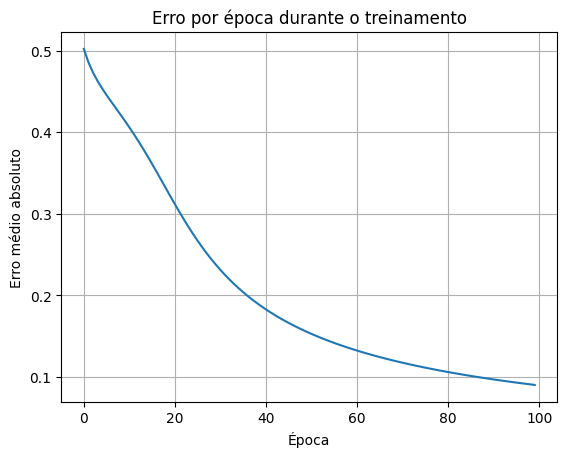

In [11]:
# Importa bibliotecas necessárias
import numpy as np                      # Para trabalhar com arrays e operações matriciais
import matplotlib.pyplot as plt         # Para exibir o gráfico do erro durante o treinamento

# Define os dados de entrada (8 amostras com 3 atributos cada)
entradas = np.array([[0,0,0],
                     [1,0,0],
                     [0,1,0],
                     [1,1,0],
                     [0,0,1],
                     [1,0,1],
                     [0,1,1],
                     [1,1,1]])

# Define os dados de saída esperados (valores alvo correspondentes às entradas)
saidas = np.array([[0],[1],[0],[0],[1],[1],[0],[0]])

# Inicializa os pesos da camada de entrada para a camada oculta com valores aleatórios entre -1 e 1
pesos0 = 2 * np.random.random((3,3)) - 1  # 3 entradas x 3 neurônios na camada oculta

# Inicializa os pesos da camada oculta para a camada de saída com valores aleatórios entre -1 e 1
pesos1 = 2 * np.random.random((3,1)) - 1  # 3 neurônios ocultos x 1 neurônio de saída

# Define o número de épocas (iterações de treinamento) e a taxa de aprendizagem
epocas = 100
taxaAprendizagem = 1  # Valor alto; pode causar instabilidade em problemas mais complexos

# Define a função de ativação sigmoide (função logística)
def sigmoid(soma):
    return 1 / (1 + np.exp(-soma))  # Retorna um valor entre 0 e 1

# Define a derivada da sigmoide (usada no cálculo do gradiente durante backpropagation)
def sigmoidDerivada(sig):
    return sig * (1 - sig)

# Função que treina a rede neural
def treina_rede(entradas, saidas, pesos0, pesos1, epocas, taxaAprendizagem):
    erros = []  # Lista para armazenar o erro médio absoluto em cada época

    # Loop de treinamento
    for j in range(epocas):
        # FORWARD PASS
        camadaEntrada = entradas                                      # Entrada da rede
        somaSinapse0 = np.dot(camadaEntrada, pesos0)                 # Soma ponderada da entrada com pesos da camada 0
        camadaOculta = sigmoid(somaSinapse0)                         # Ativação da camada oculta (sigmoide)

        somaSinapse1 = np.dot(camadaOculta, pesos1)                  # Soma ponderada da camada oculta com pesos da camada 1
        camadaSaida = sigmoid(somaSinapse1)                          # Ativação da camada de saída (sigmoide)

        # BACKPROPAGATION
        erroCamadaSaida = saidas - camadaSaida                       # Calcula o erro entre a saída desejada e a obtida
        mediaAbsoluta = np.mean(np.abs(erroCamadaSaida))             # Calcula o erro médio absoluto
        erros.append(mediaAbsoluta)                                  # Armazena o erro para exibição posterior

        derivadaSaida = sigmoidDerivada(camadaSaida)                 # Derivada da sigmoide na saída
        deltaSaida = erroCamadaSaida * derivadaSaida                 # Calcula o delta da saída (gradiente local)

        pesos1Transposta = pesos1.T                                   # Transpõe pesos da segunda camada
        deltaSaidaXPeso = deltaSaida.dot(pesos1Transposta)           # Propaga o erro para a camada oculta
        deltaCamadaOculta = deltaSaidaXPeso * sigmoidDerivada(camadaOculta)  # Delta da camada oculta

        # Atualização dos pesos entre camada oculta e saída
        camadaOcultaTransposta = camadaOculta.T
        pesosNovo1 = camadaOcultaTransposta.dot(deltaSaida)
        pesos1 = pesos1 + (pesosNovo1 * taxaAprendizagem)

        # Atualização dos pesos entre entrada e camada oculta
        camadaEntradaTransposta = camadaEntrada.T
        pesosNovo0 = camadaEntradaTransposta.dot(deltaCamadaOculta)
        pesos0 = pesos0 + (pesosNovo0 * taxaAprendizagem)

    # Exibe os resultados finais após o treinamento
    print("pesos0:")
    print(pesos0)                      # Mostra os pesos ajustados da primeira camada

    print("pesos1:")
    print(pesos1)                      # Mostra os pesos ajustados da segunda camada

    print("saida esperada:")
    print(saidas)                     # Mostra os valores desejados

    print("camada saida calculada:")
    print(camadaSaida)               # Mostra os valores que a rede produziu

    print("Erro final: " + str(mediaAbsoluta))  # Exibe o último erro médio

    # PLOTAGEM DO GRÁFICO DE ERRO
    plt.plot(erros)                   # Plota o erro médio por época
    plt.xlabel('Época')              # Rótulo do eixo x
    plt.ylabel('Erro médio absoluto')# Rótulo do eixo y
    plt.title('Erro por época durante o treinamento')  # Título do gráfico
    plt.grid(True)                   # Exibe grade
    plt.show()                       # Mostra o gráfico

    return pesos0, pesos1            # Retorna os pesos treinados

# Executa o treinamento da rede
pesos0, pesos1 = treina_rede(entradas, saidas, pesos0, pesos1, epocas, taxaAprendizagem)